In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1:

In [6]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [7]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [9]:
df.shape

(210, 7)

In [10]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Performing EDA

### Solution: 1.1 ) 

In [11]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

### UNIVARIATE ANALYSIS

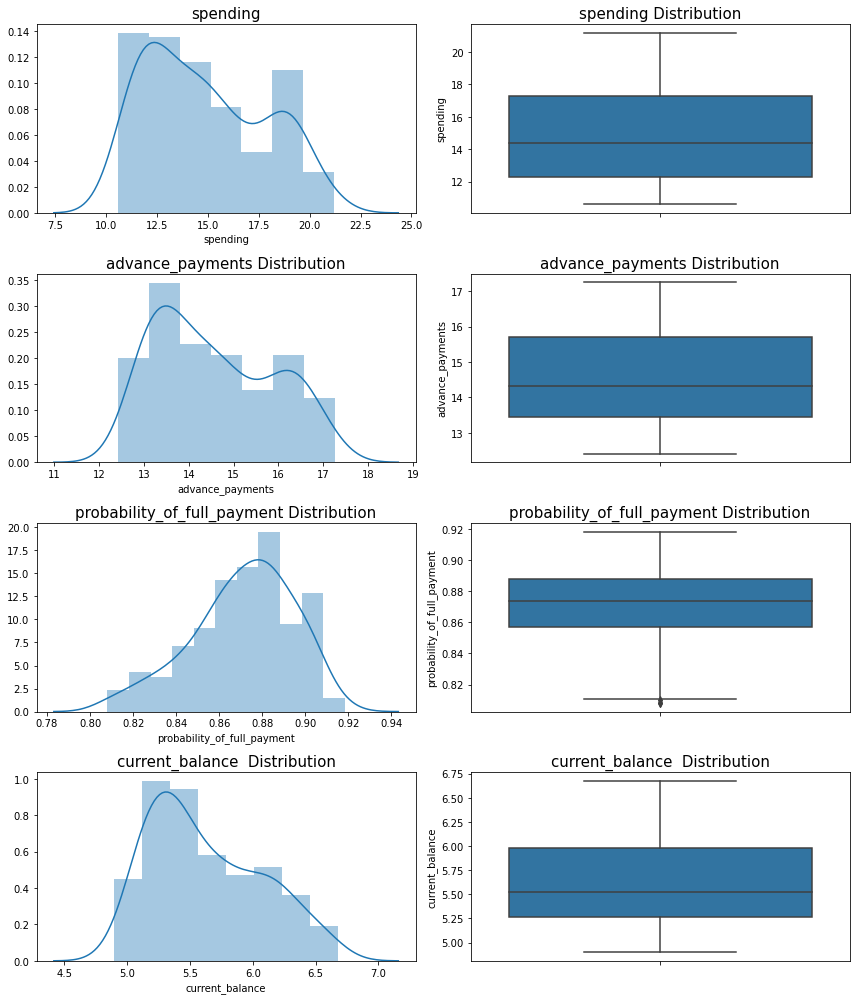

In [13]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(df['spending'] , ax=axes[0][0])
a.set_title("spending",fontsize=15)

a = sns.boxplot(df['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spending Distribution",fontsize=15)

a = sns.distplot(df['advance_payments'] , ax=axes[1][0])
a.set_title("advance_payments Distribution",fontsize=15)

a = sns.boxplot(df['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments Distribution",fontsize=15)

a = sns.distplot(df['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("probability_of_full_payment Distribution",fontsize=15)

a = sns.boxplot(df['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment Distribution",fontsize=15)

a = sns.distplot(df['current_balance'] , ax=axes[3][0])
a.set_title("current_balance  Distribution",fontsize=15)

a = sns.boxplot(df['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance  Distribution",fontsize=15)


plt.tight_layout()
plt.show()

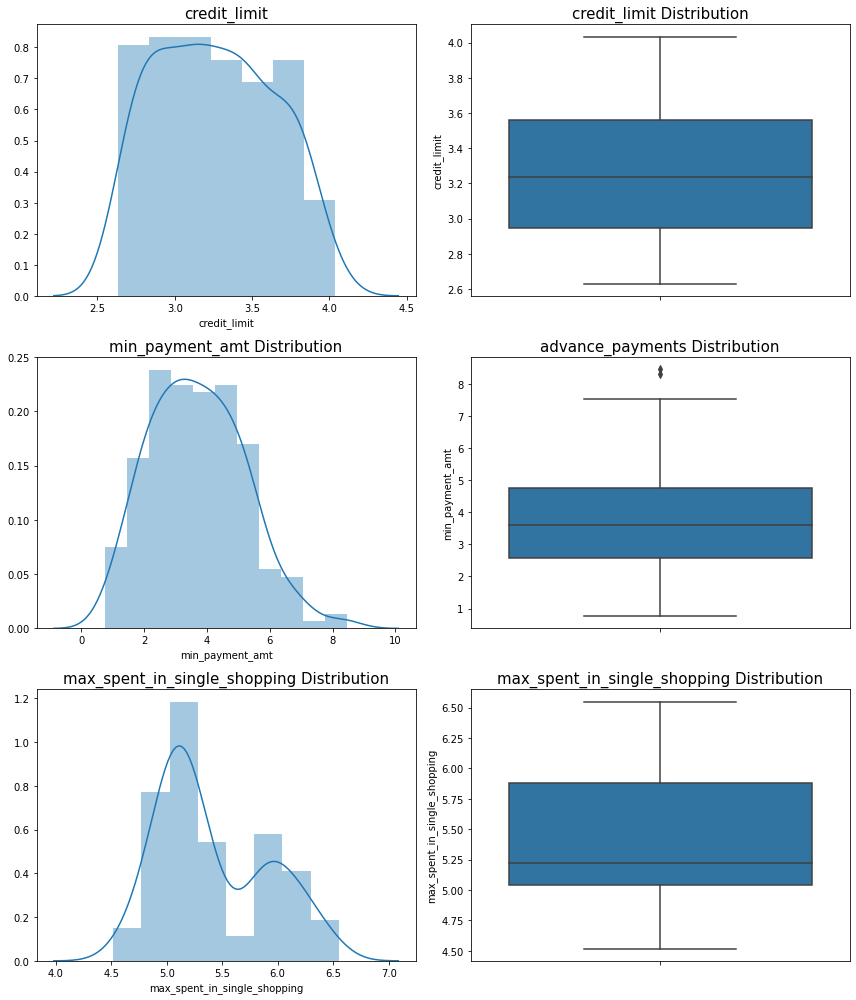

In [14]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(df['credit_limit'] , ax=axes[0][0])
a.set_title("credit_limit",fontsize=15)

a = sns.boxplot(df['credit_limit'] , orient = "v" , ax=axes[0][1])
a.set_title("credit_limit Distribution",fontsize=15)

a = sns.distplot(df['min_payment_amt'] , ax=axes[1][0])
a.set_title("min_payment_amt Distribution",fontsize=15)

a = sns.boxplot(df['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments Distribution",fontsize=15)

a = sns.distplot(df['max_spent_in_single_shopping'] , ax=axes[2][0])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)

a = sns.boxplot(df['max_spent_in_single_shopping'] , orient = "v" , ax=axes[2][1])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)

plt.tight_layout()
plt.show()

### CHECKING FOR OUTLIERS

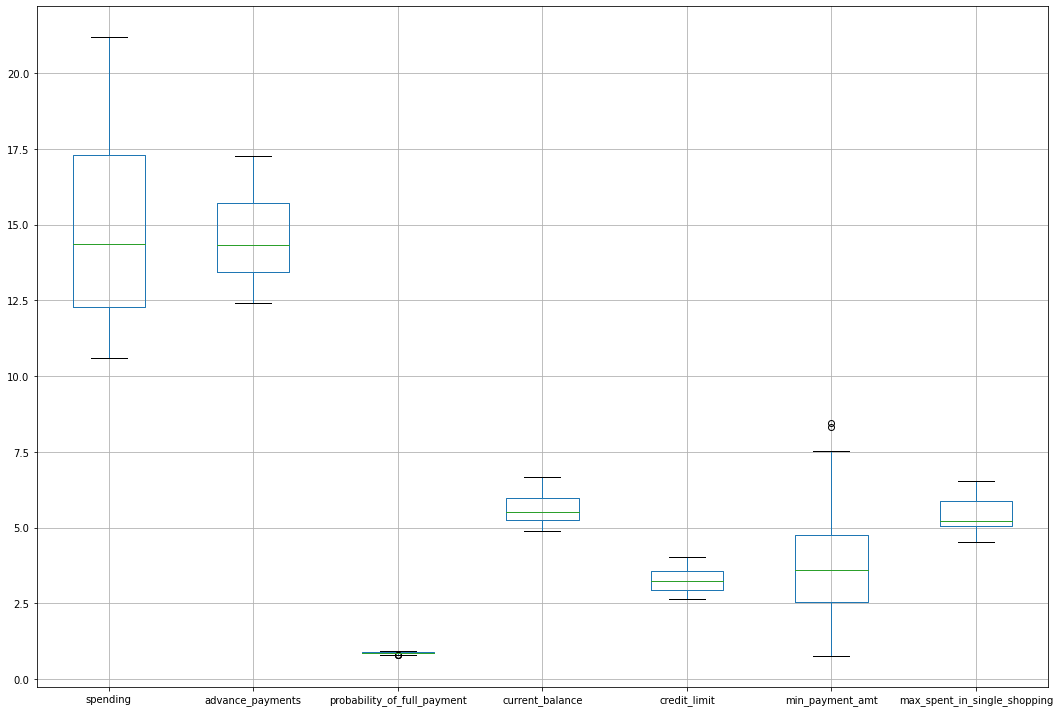

In [15]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.tight_layout()

### MULTIVARIATE ANALYSIS

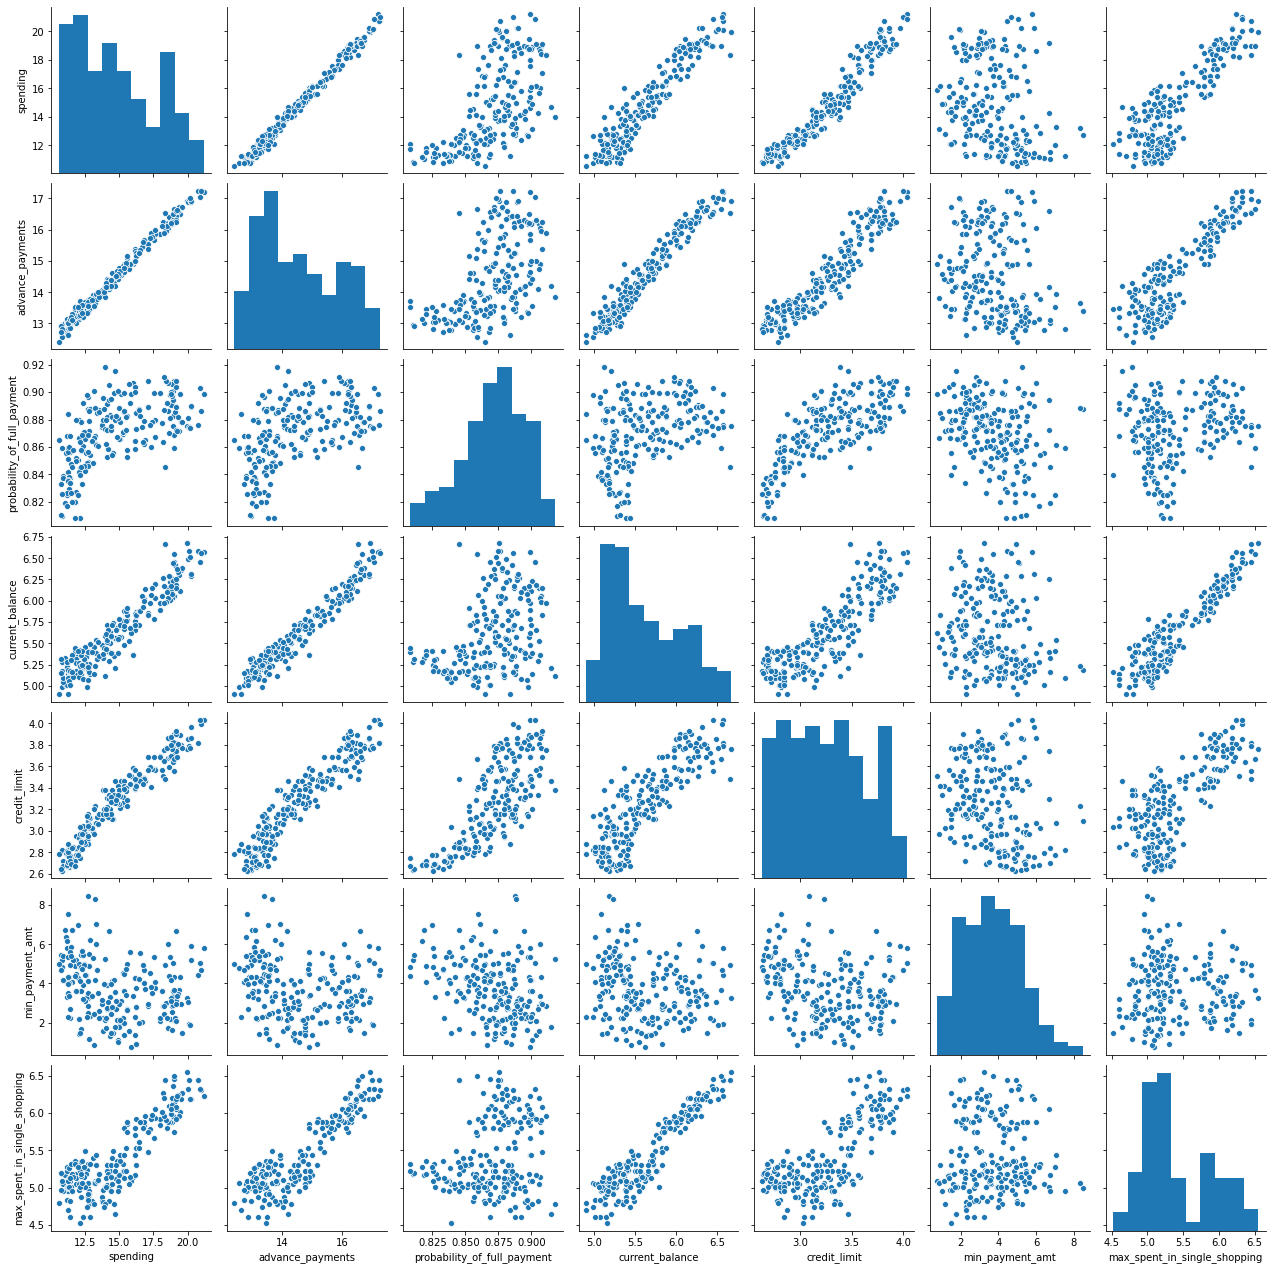

In [16]:
sns.pairplot(data=df)

### CORRELATION 

In [17]:
corr = df.corr()

<AxesSubplot:>

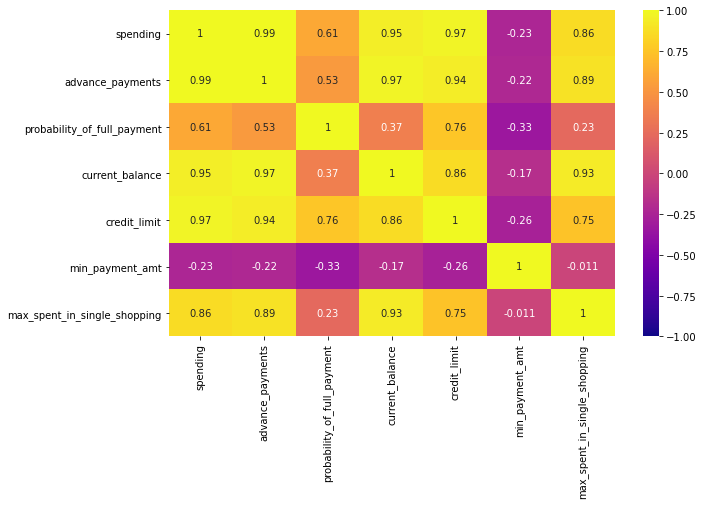

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=+1, cmap='plasma')

## Solution: 1.3)

In [19]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
df_scaled = std_scale.fit_transform(df) # returns z-scores of the values of the attribute

In [21]:
df1 = pd.DataFrame(df_scaled)
df1

,0,1,2,3,4,5,6
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


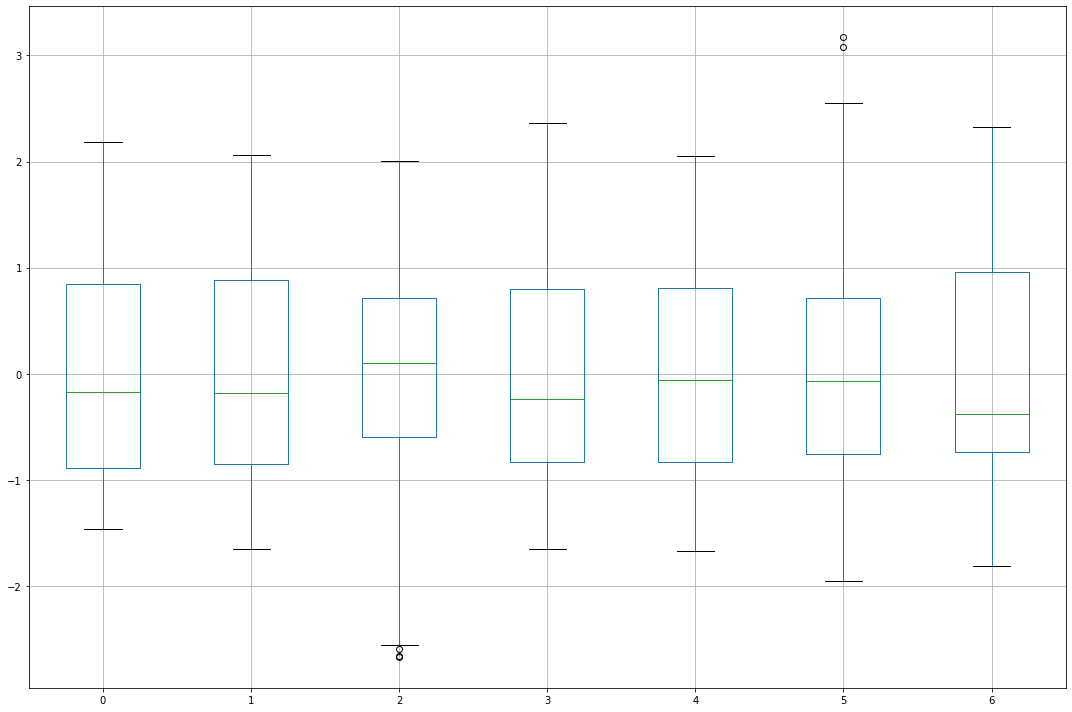

In [22]:
plt.figure(figsize=(15,10))
df1.boxplot()
plt.tight_layout()

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage #linkage --> merging two clusters

In [24]:
link_method = linkage(df_scaled, method = 'ward')

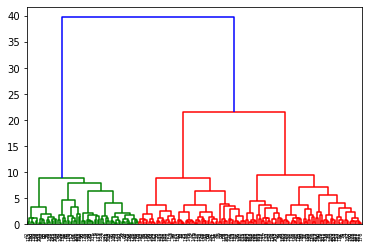

In [25]:
dend = dendrogram(link_method)

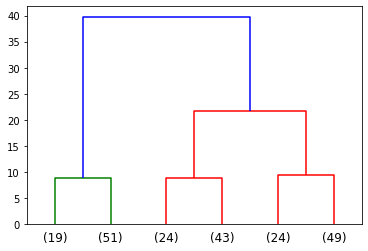

In [30]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 6
                 )

In [31]:
from scipy.cluster.hierarchy import fcluster #forming the clusters

In [32]:
# Method 1
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [33]:
# Method 2
clusters = fcluster(link_method, 25, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [86]:
# Method-3 - Create 3 Clusters using Agglomerative clustering Method:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
Cluster_No =cluster.fit_predict(df_scaled)
print(Cluster_No)

[1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0]


In [87]:
# Add Clusters back to the original_data:
df['clusters'] = Cluster_No
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [88]:
# Check Cluster Profiles
df.groupby('clusters').agg({
    'credit_limit':['count','mean'],
    'current_balance':'mean',
    'spending':'mean',
    'max_spent_in_single_shopping':'mean',
    'advance_payments':'mean',
    'min_payment_amt':'mean',
    'probability_of_full_payment': 'mean'
}).round(3)


credit_limit            current_balance   spending  \
                count       mean            mean       mean   
clusters                                                      
0                 140  30455.929        5363.714  13085.571   
1                  70  36846.286        6158.171  18371.429   

         max_spent_in_single_shopping advance_payments min_payment_amt  \
                                 mean             mean            mean   
clusters                                                                 
0                            5103.421         1376.621         373.072   
1                            6017.371         1614.543         363.916   

         probability_of_full_payment  
                                mean  
clusters                              
0                              0.864  
1                              0.884

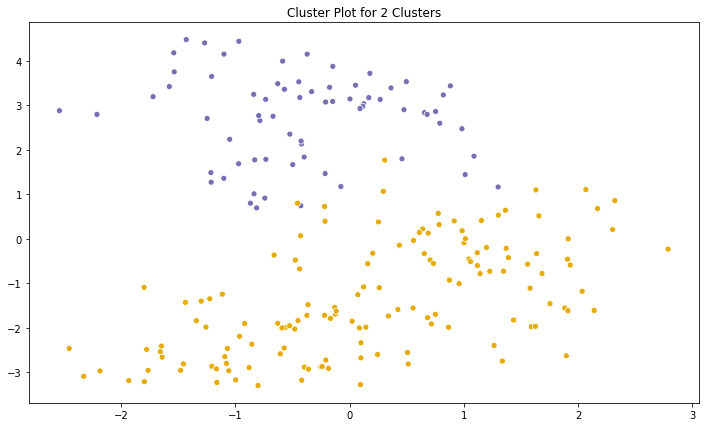

In [89]:
# Visualize Scatter-plot for 2 Clusters:
from sklearn.decomposition import PCA 
pca_2 = PCA(2) 
plot_columns = pca_2.fit_transform(df_scaled)
plt.figure(figsize=(12,7)) 
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=Cluster_No, palette='Dark2_r',legend=False) 
plt.title('Cluster Plot for 2 Clusters') 
plt.show()

## Solution: 1.4)

In [34]:
from sklearn.cluster import KMeans 

In [74]:
kmeans_df = df.drop('clusters',axis=1)

In [35]:
k_means = KMeans(n_clusters = 2)

In [36]:
k_means.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [38]:
k_means.inertia_ #total wss when k=2

659.1717544870407

In [39]:
wss = []

In [40]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [69]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.2834476674334,
 326.36254154106985,
 289.6598629113559,
 262.93923403198687,
 240.93398199905585,
 222.89769529283802,
 205.249383054979]

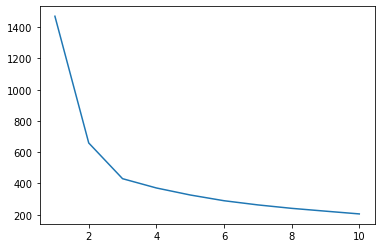

In [70]:
plt.plot(range(1,11), wss)

Text(0, 0.5, 'WCSS')

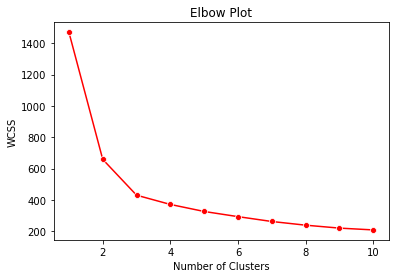

In [43]:
sns.lineplot(range(1,11),wss, marker='o',color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [74]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
labels = k_means.labels_
labels

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
silhouette_score(df_scaled,labels)  # more than 0.5 well distinguished clusters

0.46577247686580914

In [49]:
sil_width = silhouette_samples(df_scaled,labels)
sil_width

array([ 0.6037974 ,  0.00874752,  0.67803785,  0.49530556,  0.54807214,
        0.33977488,  0.58326925,  0.50325626,  0.58819046,  0.61589061,
        0.59569388,  0.34472282,  0.55860337,  0.58387274,  0.53716394,
        0.52744591,  0.10957153,  0.59242953,  0.55381269,  0.54872885,
        0.6160531 ,  0.47727965,  0.58383032,  0.56200063,  0.10101467,
        0.24988767,  0.48168779,  0.46959909,  0.56916779,  0.47686027,
        0.49562697,  0.61586637,  0.59000755,  0.01460085,  0.55546834,
        0.52173   ,  0.5396383 ,  0.55698092,  0.49870522,  0.6612224 ,
        0.63929387,  0.37565261,  0.51693827,  0.6436123 ,  0.49000343,
        0.59935435,  0.42278448,  0.64386191,  0.57615769,  0.63391341,
        0.57596349,  0.55913045,  0.6343461 ,  0.64292999,  0.67361298,
        0.44222908,  0.57219938,  0.57207891,  0.57322059,  0.61709902,
        0.30276434,  0.60285751,  0.60511045,  0.15250828,  0.29538619,
        0.6352326 ,  0.59897964,  0.38188293,  0.67505952,  0.58

In [50]:
silhouette_samples(df_scaled,labels).min()

-0.006171238927461077

In [53]:
ss=[]
for i in range(2,10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_scaled)
    labels = k_means.labels_
    x = silhouette_score(df_scaled,labels)
    print('Silhouette score for %d clusters is : %f'%(i,x))
    y= silhouette_score(df_scaled, labels).min()
    print('Minimum Silhouette width for %d clusters is : %f'%(i,y))
    ss.append(x)

Silhouette score for 2 clusters is : 0.465772
Minimum Silhouette width for 2 clusters is : 0.465772
Silhouette score for 3 clusters is : 0.400727
Minimum Silhouette width for 3 clusters is : 0.400727
Silhouette score for 4 clusters is : 0.336613
Minimum Silhouette width for 4 clusters is : 0.336613
Silhouette score for 5 clusters is : 0.285972
Minimum Silhouette width for 5 clusters is : 0.285972
Silhouette score for 6 clusters is : 0.287984
Minimum Silhouette width for 6 clusters is : 0.287984
Silhouette score for 7 clusters is : 0.279357
Minimum Silhouette width for 7 clusters is : 0.279357
Silhouette score for 8 clusters is : 0.253746
Minimum Silhouette width for 8 clusters is : 0.253746
Silhouette score for 9 clusters is : 0.256441
Minimum Silhouette width for 9 clusters is : 0.256441


Text(0, 0.5, 'Average Silhouette Score')

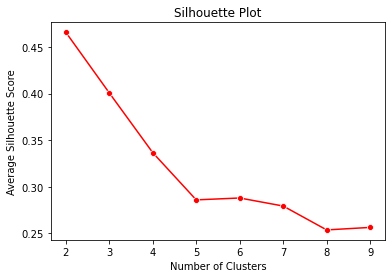

In [54]:
sns.lineplot(range(2,10), ss,marker='o',color='red')
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')

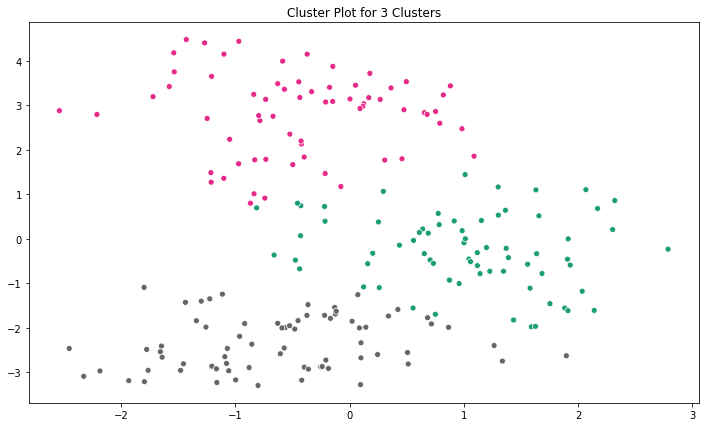

In [83]:
# Visualize Scatter-plot for 2 Clusters:
from sklearn.decomposition import PCA 
pca_2 = PCA(2) 
plot_columns = pca_2.fit_transform(df_scaled)
plt.figure(figsize=(12,7)) 
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=3, random_state=27).fit(df_scaled).labels_, palette='Dark2_r',legend=False) 
plt.title('Cluster Plot for 3 Clusters') 
plt.show()

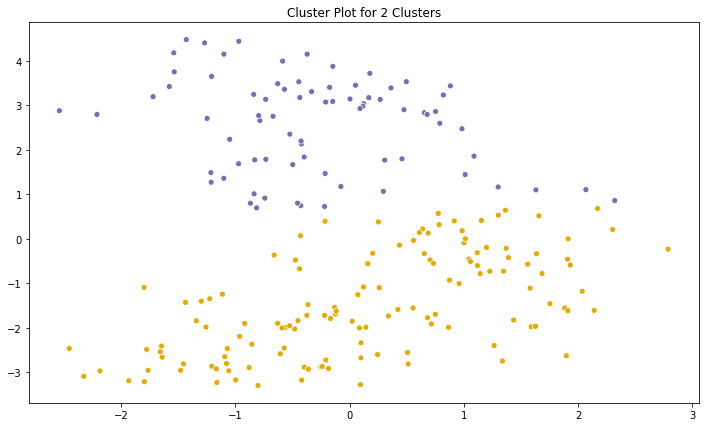

In [61]:
# Visualize Scatter-plot for 2 Clusters:
from sklearn.decomposition import PCA 
pca_2 = PCA(2) 
plot_columns = pca_2.fit_transform(df_scaled)
plt.figure(figsize=(12,7)) 
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=2, random_state=27).fit(df_scaled).labels_, palette='Dark2_r',legend=False) 
plt.title('Cluster Plot for 2 Clusters') 
plt.show()

In [62]:
# KMeans with 3 Clusters
model = KMeans(n_clusters=3, random_state=27)
model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [75]:
# Add Cuslter information back to the dataset
kmeans_df["clusters"] = model.labels_
kmeans_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [76]:
# Check Cluster Profiles
kmeans_df.groupby('clusters').agg({
    'credit_limit':['count','mean'],
    'current_balance':'mean',
    'spending':'mean',
    'max_spent_in_single_shopping':'mean',
    'advance_payments':'mean',
    'min_payment_amt':'mean',
    'probability_of_full_payment': 'mean'
}).round(3)

credit_limit            current_balance   spending  \
                count       mean            mean       mean   
clusters                                                      
0                  72  28495.417        5231.750  11856.944   
1                  67  36975.373        6175.687  18495.373   
2                  71  32592.254        5514.577  14437.887   

         max_spent_in_single_shopping advance_payments min_payment_amt  \
                                 mean             mean            mean   
clusters                                                                 
0                            5101.722         1324.778         474.239   
1                            6041.701         1620.343         363.237   
2                            5120.803         1433.775         270.734   

         probability_of_full_payment  
                                mean  
clusters                              
0                              0.848  
1                              0.884  
2                              0.882

## Solution: 1.5) 

In [55]:
df['spending'] = df.spending * 1000
df['advance_payments'] = df.advance_payments * 100
df['credit_limit'] = df.credit_limit * 10000
df['current_balance'] = df.current_balance * 1000
df['min_payment_amt'] = df.min_payment_amt * 100
df['max_spent_in_single_shopping'] = df.max_spent_in_single_shopping * 1000

df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [77]:
# Cluster Profiles using K-means clustering:
df.groupby('clusters').agg({
    'credit_limit':['count','mean'],
    'current_balance':'mean',
    'spending':'mean',
    'max_spent_in_single_shopping':'mean',
    'advance_payments':'mean',
    'min_payment_amt':'mean',
    'probability_of_full_payment': 'mean'
}).round(1).T

clusters                                  0        1        2
credit_limit                 count     73.0     70.0     67.0
                             mean   32264.5  36846.3  28485.4
current_balance              mean    5478.2   6158.2   5238.9
spending                     mean   14199.0  18371.4  11872.4
max_spent_in_single_shopping mean    5086.2   6017.4   5122.2
advance_payments             mean    1423.4   1614.5   1325.7
min_payment_amt              mean     261.2    363.9    494.9
probability_of_full_payment  mean       0.9      0.9      0.8

In [78]:
kmeans_df['spending'] = kmeans_df.spending * 1000
kmeans_df['advance_payments'] = kmeans_df.advance_payments * 100
kmeans_df['credit_limit'] = kmeans_df.credit_limit * 10000
kmeans_df['current_balance'] = kmeans_df.current_balance * 1000
kmeans_df['min_payment_amt'] = kmeans_df.min_payment_amt * 100
kmeans_df['max_spent_in_single_shopping'] = kmeans_df.max_spent_in_single_shopping * 10000

In [79]:
# Cluster Profiles using K-means clustering:
kmeans_df.groupby('clusters').agg({
    'credit_limit':['count','mean'],
    'current_balance':'mean',
    'spending':'mean',
    'max_spent_in_single_shopping':'mean',
    'advance_payments':'mean',
    'min_payment_amt':'mean',
    'probability_of_full_payment': 'mean'
}).round(1).T

clusters                                      0            1            2
credit_limit                 count         72.0         67.0         71.0
                             mean   284954166.7  369753731.3  325922535.2
current_balance              mean     5231750.0    6175686.6    5514577.5
spending                     mean    11856944.4   18495373.1   14437887.3
max_spent_in_single_shopping mean    51017222.2   60417014.9   51208028.2
advance_payments             mean      132477.8     162034.3     143377.5
min_payment_amt              mean       47423.9      36323.7      27073.4
probability_of_full_payment  mean           0.8          0.9          0.9